# **Tugas 2 Data_Understanding**
## **Penjelasan Outlier Deteksi**
### **Deteksi Outlier dengan K-Nearest Neighbors (KNN) dalam Data Understanding**  
#### 1. Pengantar Outlier dalam Data Understanding
Outlier merupakan titik data yang memiliki nilai yang jauh berbeda dibandingkan dengan sebagian besar data dalam suatu dataset. Keberadaan outlier dapat disebabkan oleh berbagai faktor, seperti kesalahan pengukuran, kesalahan input data, atau fenomena langka yang memang terjadi secara alami. Dalam tahap pemahaman data (Data Understanding), identifikasi outlier menjadi langkah krusial karena dapat memengaruhi hasil analisis, pemodelan, serta proses pengambilan keputusan. Jika tidak terdeteksi, outlier berpotensi menyebabkan bias dalam model statistik maupun machine learning, mengurangi akurasi, atau bahkan mengarah pada kesimpulan yang tidak valid.

#### 2. Konsep K-Nearest Neighbors (KNN) dalam Deteksi Outlier
K-Nearest Neighbors (KNN) adalah salah satu algoritma yang dapat digunakan untuk mendeteksi outlier. Algoritma ini bekerja berdasarkan prinsip bahwa data normal cenderung berada dalam kelompok yang padat, sementara outlier cenderung berada jauh dari kelompok tersebut. Berikut adalah konsep dasar KNN dalam deteksi outlier:


*   Prinsip Kerja dari KNN:



K-Nearest Neighbors (KNN) mendeteksi outlier dengan mengukur jarak antara suatu titik data dan titik-titik data lain di sekitarnya. Titik data yang memiliki jarak jauh dari sebagian besar tetangganya dapat diidentifikasi sebagai outlier.

Secara matematis, KNN menghitung jarak menggunakan metrik seperti Euclidean, Manhattan, atau Minkowski terhadap k-tetangga terdekat dari suatu titik data. Jika rata-rata jarak ke k-tetangga tersebut melebihi ambang batas yang telah ditentukan, maka titik data tersebut dikategorikan sebagai outlier.

#### Saat apa Menggunakan KNN untuk Deteksi Outlier?
KNN adalah metode yang efektif untuk deteksi outlier dalam situasi berikut:

Data Berdimensi Tinggi:
KNN dapat bekerja dengan baik pada data yang memiliki banyak fitur (dimensi tinggi), meskipun performanya mungkin menurun jika dimensi terlalu tinggi karena "curse of dimensionality".

Data Tanpa Asumsi Distribusi:
KNN tidak memerlukan asumsi tentang distribusi data, sehingga cocok untuk data yang tidak mengikuti distribusi normal atau distribusi tertentu.

Dataset dengan Ukuran Sedang:
KNN cocok untuk dataset yang tidak terlalu besar karena kompleksitas komputasinya yang meningkat seiring dengan jumlah data. Untuk dataset yang sangat besar, metode lain seperti Local Outlier Factor (LOF) atau Isolation Forest mungkin lebih efisien.


### **Kesimpulan**
K-Nearest Neighbors (KNN) merupakan metode yang efektif untuk mendeteksi outlier, terutama dalam tahap pemahaman data (Data Understanding). Metode ini bekerja berdasarkan prinsip jarak untuk mengidentifikasi titik data yang secara signifikan berbeda dari mayoritas data lainnya.

Meskipun KNN memiliki keunggulan dalam fleksibilitas dan kemudahan implementasi, metode ini juga memiliki keterbatasan, seperti kebutuhan komputasi yang tinggi dan sensitivitas terhadap pemilihan parameter. Oleh karena itu, penting untuk mempertimbangkan karakteristik dataset serta kebutuhan analisis sebelum menerapkan KNN dalam deteksi outlier.

Dalam praktiknya, KNN sering dikombinasikan dengan teknik lain, seperti visualisasi data menggunakan scatter plot atau box plot, guna memvalidasi hasil deteksi outlier. Pendekatan ini membantu meningkatkan kualitas data sebelum melanjutkan ke tahap pemodelan.

In [1]:
%pip install pymysql
%pip install psycopg2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


 id           class  petal_length  petal_width  sepal_length  sepal_width  distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5  5.424942    False
  2     Iris-setosa          14.0          2.0          40.9         30.0 46.407542     True
  3     Iris-setosa           1.3          0.2           4.7          3.2  5.430470    False
  4     Iris-setosa           1.5          0.2           4.6          3.1  5.273519    False
  5     Iris-setosa           1.4          0.2           5.0          3.6  5.485435     True
  6     Iris-setosa           1.7          0.4           5.4          3.9  5.288667    False
  7     Iris-setosa           1.4          0.3           4.6          3.4  5.412947    False
  8     Iris-setosa           1.5          0.2           5.0          3.4  5.325411    False
  9     Iris-setosa           1.4          0.2           4.4          2.9  5.316014    False
 10     Iris-setosa           1.5          0.1           4.9          

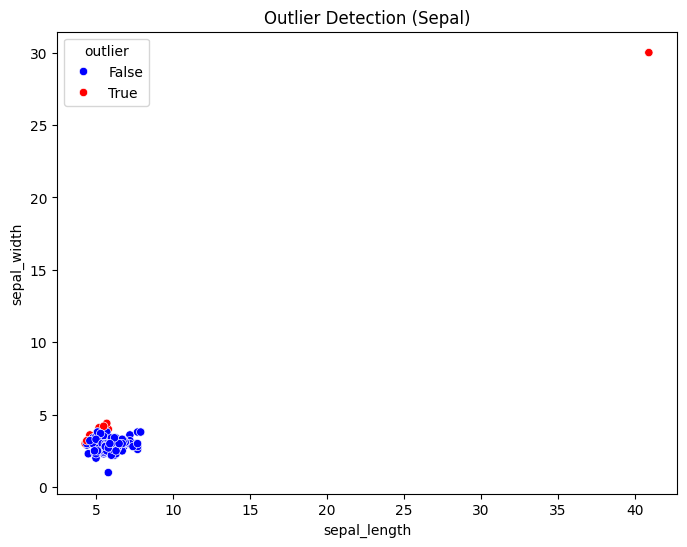

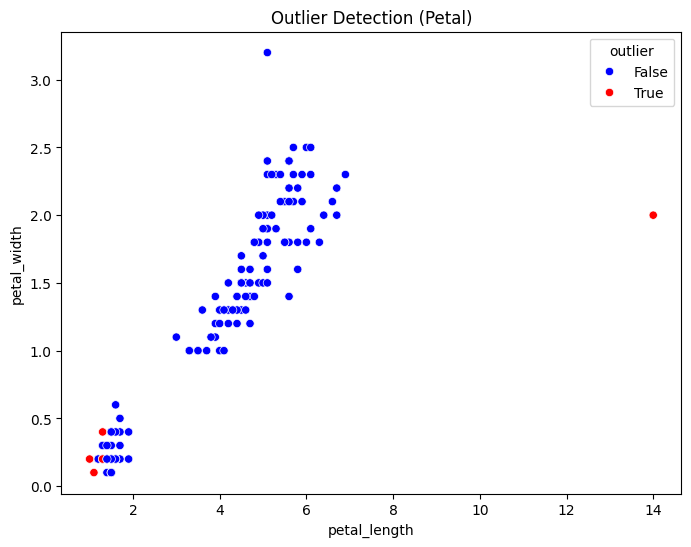

In [5]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-1b2607ab-mysqlmalik.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_vrtLmaekbIjPLe1BVzC",
        database="defaultdb",
        port=10845
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepal_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-36e0c60-mysqlmalik.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_nDXL4gOogFn3sSgwrBm",
        database="defaultdb",
        port=10845
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petalmysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Ambil referensi dari baris terakhir (baris ke-152 jika dihitung dari 1, atau index -1)
reference_point = data_values[-1]

def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dari setiap baris ke referensi
df_merged["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier berdasarkan persentil ke-95 (bisa disesuaikan)
threshold = np.percentile(df_merged["distance"], 93.5)
df_merged["outlier"] = df_merged["distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.show()


In [3]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")


Total Outlier: 10


In [4]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  distance  outlier
151             ???           5.1          3.2           5.8          1.0  0.000000    False
114  Iris-virginica           5.0          2.0           5.7          2.5  1.926136    False
115  Iris-virginica           5.1          2.4           5.8          2.8  1.969772    False
147  Iris-virginica           5.0          1.9           6.3          2.5  2.049390    False
120  Iris-virginica           5.0          1.5           6.0          2.2  2.092845    False
143  Iris-virginica           5.1          1.9           5.8          2.7  2.140093    False
102  Iris-virginica           5.1          1.9           5.8          2.7  2.140093    False
122  Iris-virginica           4.9          2.0           5.6          2.8  2.181742    False
133  Iris-virginica           5.6          2.2           6.4          2.8  2.202272    False
 69 Iris-versicolor           4.5          1.5           6.2          